Imports

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import seaborn as sns

Define data filepath and check existence

In [2]:
data_filepath = pathlib.Path('churn.csv')
if data_filepath.exists():
    print('File exists')

File exists


Data cleaning/prepartion

In [3]:
df_pl = pl.read_csv(data_filepath)

# Drop select columns
df_pl = df_pl.drop(columns=['customerID', 'TotalCharges'])

# Handling the mapping of No->0 and Yes->1
binary_columns = []
for col in df_pl.columns:
    unique_values = df_pl.get_column(col).unique().sort().to_list()
    if unique_values == ['No', 'Yes']:
        binary_columns.append(col)
df_pl = df_pl.with_columns(
    pl.col(binary_columns).map_dict({'No': 0, 'Yes': 1})
)


# Handles columns with "No internet service" option
no_internet_service_columns = []
for col in df_pl.columns:
    unique_values = df_pl.get_column(col).unique().to_list()
    if 'No internet service' in unique_values:
        no_internet_service_columns.append(col)
df_pl = df_pl.to_dummies(no_internet_service_columns)
columns_to_drop = [col for col in df_pl.columns if '_No internet service' in col]
df_pl = df_pl.drop(columns=columns_to_drop)


# Handles remaining string columns
string_columns = []
for (column_name, column_dtype) in zip(df_pl.columns, df_pl.dtypes):
    if column_dtype == pl.Utf8:
        string_columns.append(column_name)
df_pl = df_pl.to_dummies(string_columns, drop_first=True)


# Convert to pandas
data = df_pl.to_pandas()

Correlation Check

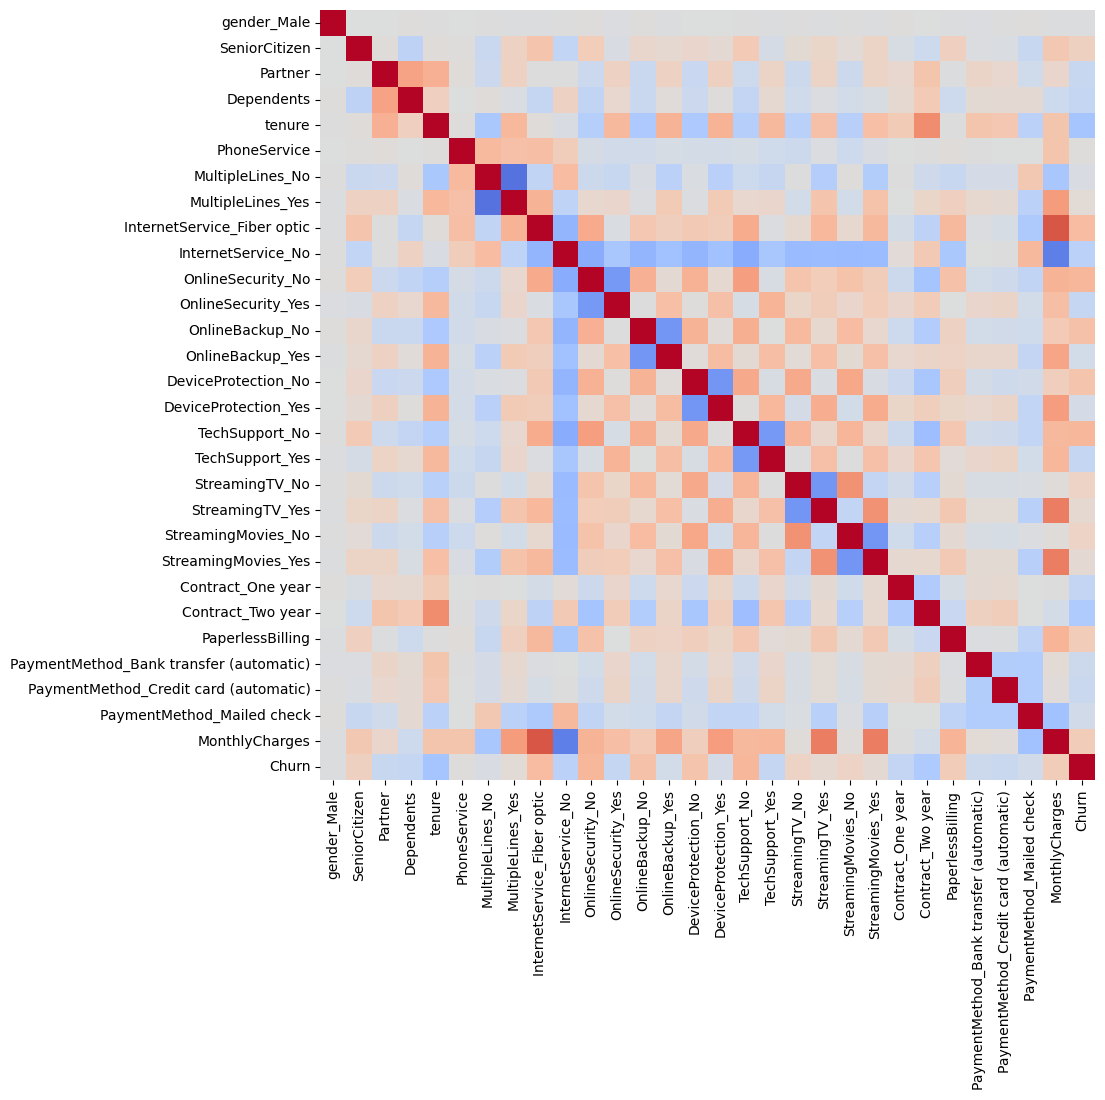

In [4]:
corr_df = data.corr()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(
    corr_df,
    vmin=-1,
    vmax=1,
    cmap='coolwarm',
    cbar=False,
    fmt='.2f',
)

plt.show()